In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
df.drop(['User ID'],axis=1,inplace=True)
df.head(3)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0


In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
df['Gender']=le.fit_transform(df['Gender'])

In [13]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [14]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [16]:
print(x.head(3))
print(y.head(3))

   Gender  Age  EstimatedSalary
0       1   19            19000
1       1   35            20000
2       0   26            43000
0    0
1    0
2    0
Name: Purchased, dtype: int64


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [19]:
x_train.shape

(320, 3)

In [20]:
x_test.shape

(80, 3)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

In [23]:
x_train[0:5]

array([[ 1.02532046, -0.61743601, -0.13021099],
       [ 1.02532046, -0.99288403,  0.51127633],
       [-0.97530483,  1.63525214,  1.73593396],
       [ 1.02532046,  0.13346004,  0.19053267],
       [ 1.02532046, -0.71129801,  1.88172653]])

In [24]:
x_test[:5]

array([[ 1.02532046,  0.69663208,  0.2488497 ],
       [-0.97530483,  1.54139013,  1.09444663],
       [ 1.02532046, -0.14812598,  0.83202   ],
       [ 1.02532046, -0.24198798,  0.07389861],
       [-0.97530483,  0.97821809,  1.85256802]])

In [25]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=5,criterion='entropy',random_state=99)
clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=99)

In [26]:
clf.predict(x_test)

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [27]:
clf.predict(scale.transform([[1,60,43000]]))

array([1], dtype=int64)

In [28]:
y_pred=clf.predict(x_test)

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [30]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[44,  9],
       [ 1, 26]], dtype=int64)

In [32]:
accuracy_score(y_test,y_pred)*100

87.5

In [33]:
clf.estimators_

[DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=739930753),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=955800611),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=2096280761),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1425706152),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1397991113)]

In [34]:
clf.estimators_[0]

DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=739930753)

In [35]:
from sklearn import tree

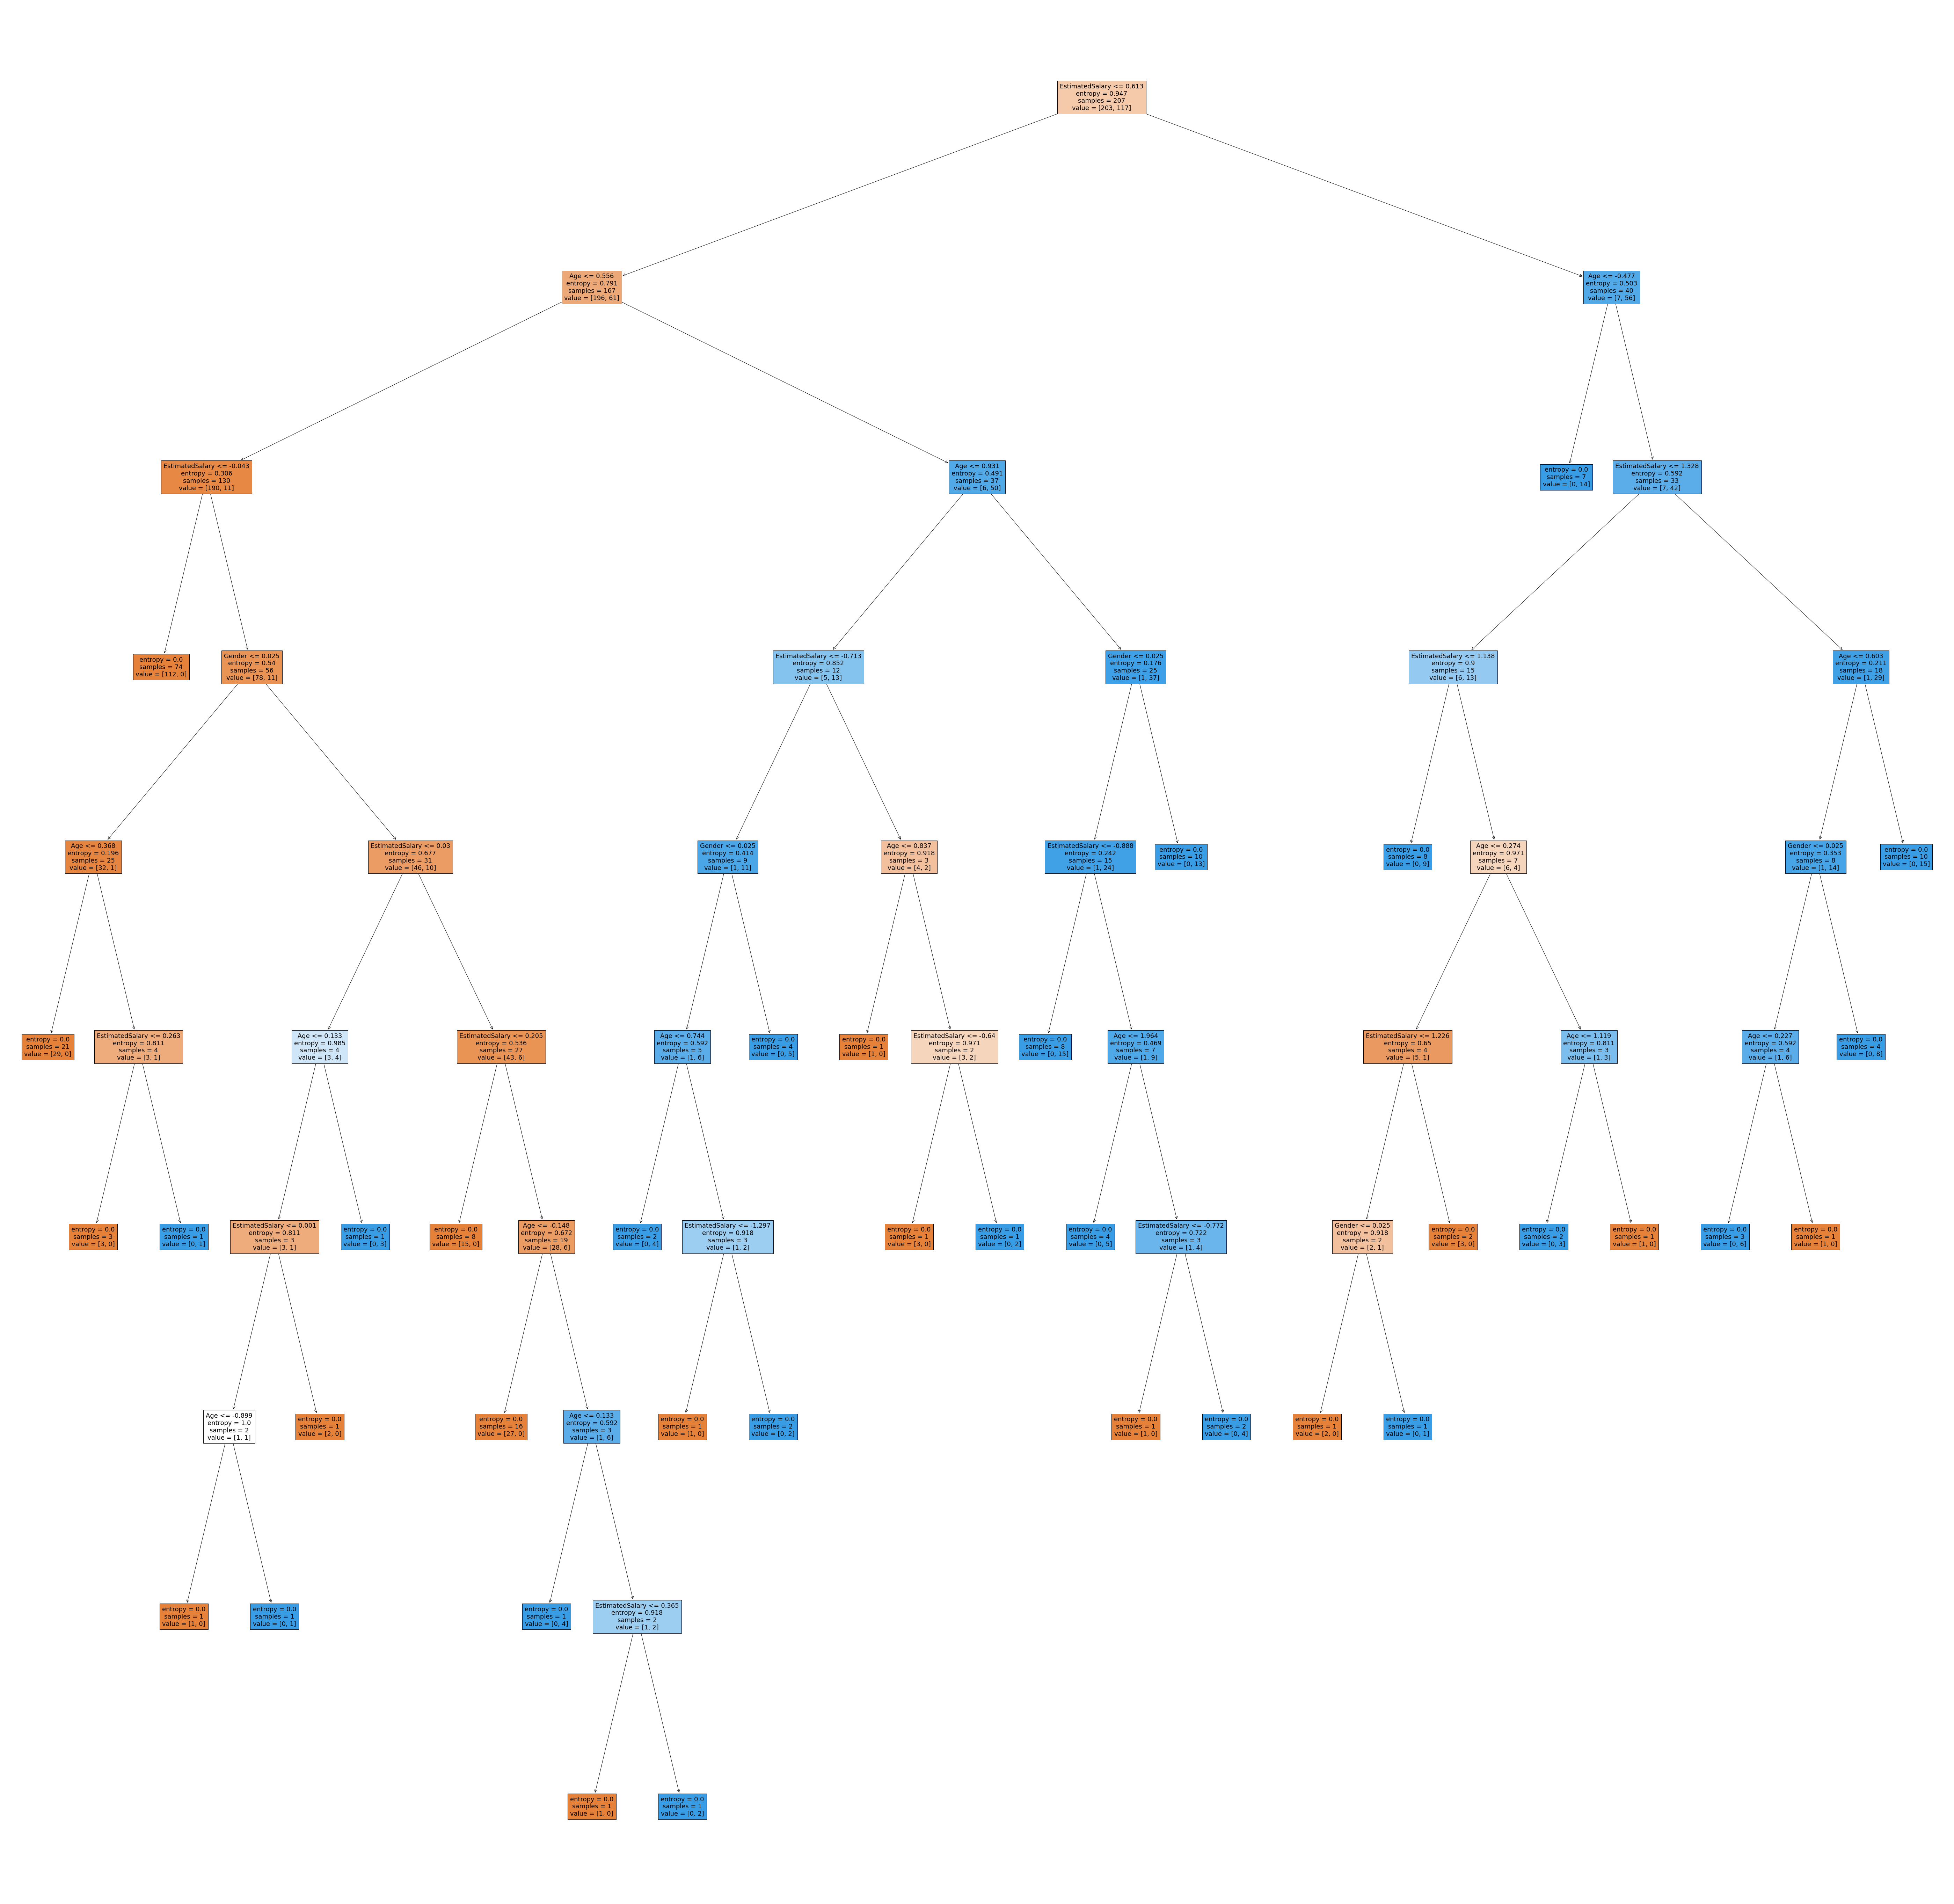

In [38]:
plt.figure(figsize=(100,100))
tree.plot_tree(clf.estimators_[0],feature_names=x.columns,filled=True)
plt.show()